In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

In [13]:
df = pd.read_excel('Titanic_passenger_List.xlsx', sheet_name='passenger_list')
df2 = pd.read_excel('Titanic_passenger_List.xlsx', sheet_name='Definitions')

In [14]:
df2.head(15)

,Variable,Definition,Key
0,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
1,survival,Survival,"0 = No, 1 = Yes"
2,Name,Name,NaN
3,sex,Sex,NaN
4,Age,Age in years,NaN
5,sibsp,# of siblings / spouses aboard the Titanic,NaN
6,parch,# of parents / children aboard the Titanic,NaN
7,ticket,Ticket number,NaN
8,fare,Passenger fare,NaN
9,cabin,Cabin number,NaN


In [15]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 107.4+ KB


In [17]:
df_count = df.groupby(['pclass','sex','survived']).name.count().to_frame()

In [18]:
df_count

name
pclass sex    survived      
1      female 0            5
              1          139
       male   0          118
              1           61
2      female 0           12
              1           94
       male   0          146
              1           25
3      female 0          110
              1          106
       male   0          418
              1           75

In [19]:
reset_df = df_count.reset_index()

In [20]:
reset_df

,pclass,sex,survived,name
0,1,female,0,5
1,1,female,1,139
2,1,male,0,118
3,1,male,1,61
4,2,female,0,12
5,2,female,1,94
6,2,male,0,146
7,2,male,1,25
8,3,female,0,110
9,3,female,1,106


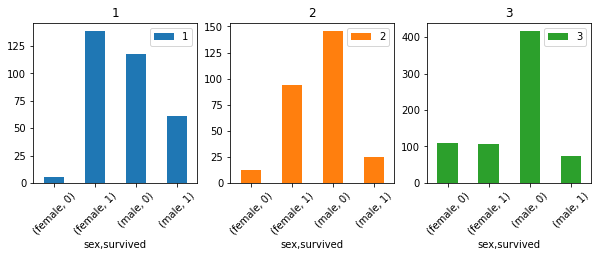

In [48]:
ax = df_count['name'].unstack(level=0).plot(kind='bar', subplots=True, rot=45, figsize=(10,10), layout=(3,3))
plt.show()

https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index

[namespace(patch=<matplotlib.patches.PathPatch at 0x4a9a6b8>,
           flows=array([ 1, -1]),
           angles=[-1.0, -1.0],
           tips=array([[ 1.03819319e-17, -1.69549816e-01],
                       [ 4.25395029e-17, -6.94722805e-01]]),
           text=Text(0, 0, ''),
           texts=[Text(1.1970809542274484e-18, -0.01954981558863997, 'input\n1'),
                  Text(5.172435393635205e-17, -0.8447228045239584, 'output\n1')])]

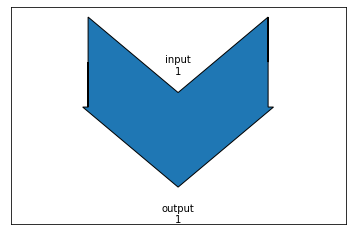

In [23]:
sankey = Sankey()
sankey.add(flows=[1,-1],
          labels=['input','output'],
          rotation=-90)
sankey.finish()

https://towardsdatascience.com/funnel-charts-with-python-1ef1a2b183ab

In [24]:
reset_df['count'] = reset_df['name']

In [25]:
reset_df

,pclass,sex,survived,name,count
0,1,female,0,5,5
1,1,female,1,139,139
2,1,male,0,118,118
3,1,male,1,61,61
4,2,female,0,12,12
5,2,female,1,94,94
6,2,male,0,146,146
7,2,male,1,25,25
8,3,female,0,110,110
9,3,female,1,106,106


In [26]:
reset_df['pclass'] = reset_df['pclass'].replace([1,2,3], ['First Class', 'Second Class','Third Class'])

In [27]:
reset_df['survived'] = reset_df['survived'].replace([0,1], ['Did Not Survive', 'Survived'])

In [28]:
del reset_df['name']

In [29]:
reset_df

,pclass,sex,survived,count
0,First Class,female,Did Not Survive,5
1,First Class,female,Survived,139
2,First Class,male,Did Not Survive,118
3,First Class,male,Survived,61
4,Second Class,female,Did Not Survive,12
5,Second Class,female,Survived,94
6,Second Class,male,Did Not Survive,146
7,Second Class,male,Survived,25
8,Third Class,female,Did Not Survive,110
9,Third Class,female,Survived,106


In [30]:
# import plotly.express as px

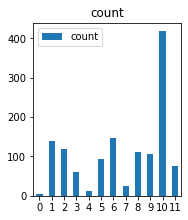

In [31]:
reset_df.plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
plt.show()

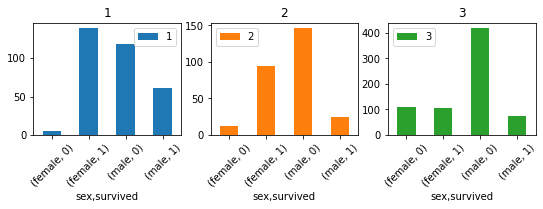

In [55]:
ax = df_count['name'].unstack(level=0).plot(kind='bar', subplots=True, rot=45, figsize=(9,7), layout=(3,3))
plt.show()

In [34]:
all_nodes = reset_df.pclass.values.tolist() + reset_df.sex.values.tolist()
source_indices = [all_nodes.index(pclass) for pclass in reset_df.pclass]
target_indices = [all_nodes.index(sex) for sex in reset_df.sex]

colors = pex.colors.qualitative.D3
node_colors = [np.random.choice(colors) for node in all_nodes]

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 1.0),
      label =  all_nodes,
      color =  node_colors,
    ),

    link = dict(
      source =  source_indices,
      target =  target_indices,
      value =  reset_df.count.Value,
))])

fig.update_layout(title_text="User Journey on Website",
                  height=600,
                  font=dict(size = 10, color = 'white'),
                  plot_bgcolor='black', paper_bgcolor='black')

fig.show()

NameError: name 'pex' is not defined